### CruiseMaps with Data

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

#using xarray for bathymetry data read
from erddapy import ERDDAP
import pandas as pd
import numpy as np
import xarray as xa

extent=[-167.5, -150, 52.5, 60]

server_url = 'https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111'
bathy = xa.open_dataset(server_url) 
bathy_sub = bathy.sel(latitude=slice(extent[3],extent[2]),longitude=slice(extent[0],extent[1]))

#bathy_sub.topo.plot(cmap=cmocean.cm.gray)

In [2]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

In [6]:

server_url='http://akutan.pmel.noaa.gov:8080/erddap'
e = ERDDAP(server=server_url)

cruise='CTD_dy1904_final'

#build download url
download_url = e.get_download_url(
    dataset_id=cruise,
    protocol='tabledap',
    response='csv'
)
print(download_url)

http://akutan.pmel.noaa.gov:8080/erddap/tabledap/CTD_dy1904_final.csv?


In [19]:
from requests.exceptions import HTTPError


try:
    e = ERDDAP(server=server_url,
        protocol='tabledap',
        response='csv'
    )

    e.dataset_id=cruise
    
    
except HTTPError:
    print('Failed to generate url {}'.format(cruise))

    
try:
    df = e.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
    df.columns = [x[1].split()[0] for x in enumerate(df.columns)]
except:
    print('Failed to ingest {}'.format(cruise))


In [20]:
df.groupby('profile_id').first()

,pressure,latitude,longitude,BTL_103,S_42,S_41,ST_70,Fch_906,T_28,OST_62,O_65,T2_35,Tr_904,Water_Depth,air_pressure_at_sealevel,wind_direction,wind_speed,air_temperature,Station_Name
profile_id,,,,,,,,,,,,,,,,,,,
dy1904c001_ctd,1.0,57.722668,207.70600,NaN,32.1987,32.1964,25.301147,NaN,6.2980,98.158226,291.37387,6.2981,NaN,183.0,1006.0,38.0,9.0,4.6,19CB1A
dy1904c002_ctd,0.0,54.439335,194.69600,NaN,32.2449,32.2485,25.492920,NaN,5.0132,95.189070,291.10965,5.0121,NaN,155.0,1009.0,340.0,24.0,0.5,AL19_AU_BS4
dy1904c003_ctd,0.0,54.338500,194.57483,NaN,32.3062,32.3045,25.544190,NaN,4.9498,95.510370,292.41130,4.9487,NaN,157.0,1011.0,336.0,23.0,0.2,UBS4
dy1904c004_ctd,0.0,54.377335,194.73433,NaN,32.1698,32.1697,25.434937,NaN,4.9718,95.658400,293.00604,4.9716,NaN,165.0,1011.0,356.0,24.0,0.0,UBS3
dy1904c005_ctd,0.0,54.424500,194.85083,NaN,31.8444,31.8411,25.168090,NaN,5.0325,95.898470,294.03757,5.0389,NaN,141.0,1010.0,325.0,24.0,0.5,UBS2
dy1904c006_ctd,0.0,54.445000,195.01117,NaN,31.4783,31.4768,24.887207,NaN,4.9620,96.910700,298.45142,4.9621,NaN,51.0,1011.0,328.0,27.0,0.5,UBS1
dy1904c007_ctd,0.0,54.825832,195.10100,NaN,31.5176,31.5162,24.934204,NaN,4.8126,98.553734,304.50714,4.8096,NaN,77.0,1011.0,313.0,23.0,1.5,UBE2
dy1904c008_ctd,0.0,56.767500,195.66083,NaN,31.9206,31.9198,25.350586,NaN,3.8546,100.156850,315.74010,3.8553,NaN,74.0,1010.0,278.0,10.0,0.2,M2W
dy1904c009_ctd,0.0,56.665333,196.12967,NaN,31.9325,31.9307,25.328370,NaN,4.1726,104.467650,326.77124,4.1703,NaN,75.0,1010.0,281.0,7.0,1.4,M2S


In [21]:
dfg = df.groupby('profile_id').first()

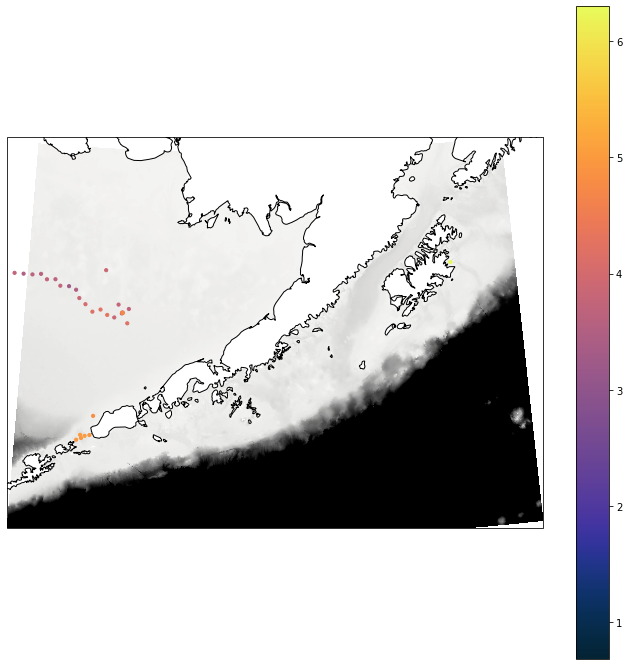

In [23]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)

ax.pcolormesh(bathy_sub.longitude, bathy_sub.latitude, 
              bathy_sub.topo, cmap=cmocean.cm.gray,
              vmin=-3000,vmax=100,
              transform=transformation)
c = ax.scatter(dfg.longitude, dfg.latitude, s=10,
                               c=dfg.T_28, cmap=cmocean.cm.thermal,
                               transform=transformation)
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)
        

#fig.savefig('DY1904_temp.png',dpi=300)